# Etude de faisabilité moteur de classification partie image approche SIFT

# Importation librairies primaires

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conda list python

# packages in environment at C:\Users\ARMAN\anaconda3\envs\projet_6_OC:
#
# Name                    Version                   Build  Channel
brotli-python             1.0.9            py38hd77b12b_7  
google-api-python-client  2.108.0                  pypi_0    pypi
ipython                   8.12.2           py38haa95532_0  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
opencv-python-headless    4.8.1.78                 pypi_0    pypi
python                    3.8.18               h1aa4202_0  
python-dateutil           2.8.2              pyhd3eb1b0_0  
python-fastjsonschema     2.16.2           py38haa95532_0  
python-json-logger        2.0.7            py38haa95532_0  
python-slugify            8.0.1                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [6]:
# on agrandit la fenretre de lecture
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_colwidth", 250)

# 1) Importation du fichier

In [7]:
# importation dataframe
df = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [8]:
# 5 premières données
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...",No rating available,No rating available,SANTOSH ROYAL 

In [9]:
# 5 dernières données
df.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-large-self-adhesive-sticker/p/itme88zgzgcvtbpx?pid=STIE88ZGTX65GH4V,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This ...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""Sheet Containing Set of Small Stickers""}, {""key""=>""Ideal Use"", ""value""=>""Any place where there is need of ample de..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl-sticker/p/itmec889fxheshyg?pid=STIEC889ZD5GDCVQ,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,"Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend...",No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""1 Wall Decal/Sticker, 1 Practice Decal, Instructions""}, {""key""=>""Ideal Use"", ""value""=>""Child Bedroom, Bedroom, Liv..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-pigmented-polyvinyl-films-imported-sticker/p/itme5uvggyhfrd4p?pid=STIE5UVGW2JWVWCT,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replac...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""Sticker""}, {""key""=>""Brand"", ""value""=>""Uberlyfe""}, {""key""=>""Type"", ""value""=>""Pigmented Polyvinyl Films (Imported)""}..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-vinyl-sticker/p/itmec889gxdsfhzb?pid=STIEC889ZGFD3RCE,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]",STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker for Rs.1333 online. Wallmantra Medium Vinyl Sticker Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""1 Wall Decal/Sticker, 1 Practice Decal, Instructions""}, {""key""=>""Ideal Use"", ""value""=>""Child Bedroom, Bedroom, Liv..."
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/

In [10]:
# lignes aléatoires
df.sample(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
247,87f1807e002d3555b8dfb465a8a61df2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/leo-natura-paniarakkal-7-hole-kadhai-na-l/p/itmeycf7sv957kbz?pid=PTPEYCF7GZU2T54E,Leo Natura Paniarakkal 7 Hole Kadhai NA L,"[""Kitchen & Dining >> Cookware >> Pots & Pans >> Woks & Kadhais >> Leo Natura Woks & Kadhais""]",PTPEYCF7GZU2T54E,780.0,649.0,87f1807e002d3555b8dfb465a8a61df2.jpg,False,Buy Leo Natura Paniarakkal 7 Hole Kadhai NA L for Rs.649 online. Leo Natura Paniarakkal 7 Hole Kadhai NA L at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.,5,5,Leo Natura,"{""product_specification""=>[{""key""=>""Pan Type"", ""value""=>""Paniarakkal""}, {""key""=>""Brand"", ""value""=>""Leo Natura""}, {""key""=>""Non-stick"", ""value""=>""Yes""}, {""key""=>""Model Number"", ""value""=>""PK-7""}, {""key""=>""Induction Bottom"", ""value""=>""No""}, {""key""=>""..."
372,ea82cb68a6e79d3c10fe9c4255c6a508,2015-12-01 06:13:00 +0000,http://www.flipkart.com/wild-stone-charge-surge-combo-set/p/itmed6gkyekpgbmf?pid=CAGED6GKHQTG5RYF,"Wild Stone Charge,Surge Combo Set","[""Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Wild Stone Combos""]",CAGED6GKHQTG5RYF,398.0,350.0,ea82cb68a6e79d3c10fe9c4255c6a508.jpg,False,"Flipkart.com: Buy Wild Stone Charge,Surge Combo Set online only for Rs. 345 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of Contents in Set"", ""value""=>""2""}, {""key""=>""Combo Set Content"", ""value""=>""1 Charge 1 Surge""}, {""key""=>""Ideal For"", ""value""=>""Men""}, {""value""=>""1 Charge, 1 Surge""}]}"
555,51c9062e6538c787b14a75a6a7cb7fb3,2016-01-07 05:50:25 +0000,http://www.flipkart.com/sonata-7007sl02-analog-watch-men/p/itmdwgam7yq7ejuw?pid=WATDWGAHRCPFYWGW,Sonata 7007SL02 Analog Watch - For Men,"[""Watches >> Wrist Watches >> Sonata Wrist Watches""]",WATDWGAHRCPFYWGW,725.0,725.0,51c9062e6538c787b14a75a6a7cb7fb3.jpg,True,"Sonata 7007SL02 Analog Watch - For Men - Buy Sonata 7007SL02 Analog Watch - For Men 7007SL02 Online at Rs.725 in India Only at Flipkart.com. Rectangular Dial, Black Strap, Water Resistant, Buckle Clasp - Great Discounts, Only Genuine Products,...",3.5,3.5,NaN,"{""product_specification""=>[{""key""=>""Mechanism"", ""value""=>""Quartz""}, {""key""=>""Type"", ""value""=>""Analog""}, {""key""=>""Style Code"", ""value""=>""7007SL02""}, {""key""=>""Ideal For"", ""value""=>""Men""}, {""key""=>""Weight"", ""value""=>""20 g""}, {""key""=>""Height"", ""value..."
358,91e22428c0dd8871288ba5dac35a7382,2015-12-01 06:13:00 +0000,http://www.flipkart.com/spinz-combo-set/p/itme38d7f66drqjm?pid=CAGE38D7F5XQSYNC,Spinz Combo Set,"[""Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Spinz Combos""]",CAGE38D7F5XQSYNC,599.0,354.0,91e22428c0dd8871288ba5dac35a7382.jpg,False,Flipkart.com: Buy Spinz Combo Set online only for Rs. 354 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!,5,5,NaN,"{""product_specification""=>[{""key""=>""Number of Contents in Set"", ""value""=>""3""}, {""key""=>""Gift Set Content"", ""value""=>""N/A""}, {""key""=>""Combo Set Content"", ""value""=>""Combo Set-Hypnotty""}]}"
391,7fd12776e6d62da6e1dd3cbc9882ee5f,2015-12-01 06:13:00 +0000,http://www.flipkart.com/asus-dsl-n10-c1/p/itme3wyagt73xhrz?pid=RTRE3WYAU6HNKCGS,Asus DSL-N10_C1,"[""Computers >> Network Components >> Routers >> Asus Routers""]",RTRE3WYAU6HNKCGS,4500.0,1700.0,7fd12776e6d62da6e1dd3cbc9882ee5f.jpg,False,Buy Asus DSL-N10_C1 only for Rs. 1700 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!,No rating available,No 

In [11]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [12]:
# valeures uniques
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [13]:
# valeurs nulles
df.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [14]:
# valeures nulles
df.isnull().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [15]:
# Lignes dupliquées
df.duplicated().sum()

0

In [16]:
# check colonne 
df['product_rating'].value_counts()

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: product_rating, dtype: int64

In [17]:
# check colonne 
df['overall_rating'].value_counts()

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: overall_rating, dtype: int64

In [18]:
# check colonne 
df['is_FK_Advantage_product'].value_counts()

False    993
True      57
Name: is_FK_Advantage_product, dtype: int64

In [19]:
# check colonne 
df['brand'].value_counts()

PRINT SHAPES          11
Lapguard              11
Lal Haveli            10
Raymond                8
Aroma Comfort          8
                      ..
Rute                   1
NAMS                   1
JewelKraft Designs     1
Budding Bees           1
Zero                   1
Name: brand, Length: 490, dtype: int64

In [20]:
# check colonne 
df[["description", "product_specifications"]]

,description,product_specifications
0,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...","{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value..."
1,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...","{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM..."
2,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...","{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"",..."
3,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...","{""product_specification""=>[{""key""=>""Brand"", ""value""=>""SANTOSH ROYAL FASHION""}, {""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Type"", ""value""=>""Flat""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Model Name"", ""value""=>""Gold Design Roya..."
4,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comf...","{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Brand"", ""value""=>""Jaipur Print""}, {""key""=>""Type"", ""value""=>""Flat""}, {""key""=>""Model Name"", ""value""=>""jaipur117""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Thr..."
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This ...,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""Sheet Containing Set of Small Stickers""}, {""key""=>""Ideal Use"", ""value""=>""Any place where there is need of ample de..."
1046,"Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend...","{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""1 Wall Decal/Sticker, 1 Practice Decal, Instructions""}, {""key""=>""Ideal Use"", ""value""=>""Child Bedroom, Bedroom, Liv..."
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker at best prices with FREE sh

In [21]:
# check colonne 
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [22]:
df['product_category_tree'][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [23]:
# Séléction des colonnes pertinentes
df = df[['product_name','image','product_category_tree']]

In [24]:
df

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]"
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]"
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]"
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]"
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]"
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]"
1046,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]"
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,5912e037d12774bb73a2048f35a00009.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]"
1048,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]"


In [25]:
# check à nouveau valeur nulles
df.isnull().sum()

product_name             0
image                    0
product_category_tree    0
dtype: int64

# 2) Exploration Data Analyze

In [26]:
import sklearn

In [27]:
import re
import nltk
from sklearn.preprocessing import LabelEncoder

In [28]:
df.head()

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]"
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]"
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]"
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]"
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]"


In [29]:
# Extraction des catégories
# Suppression caractères ">>"
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split(">>"))
# Sélèction de la première valeur
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x[0])
# Supression catactères inutiles
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : re.sub("[\"\[]","",x))

In [30]:
# Comptage
df['product_category_tree'].value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: product_category_tree, dtype: int64

In [31]:
# check valeurs nulles
df.isnull().sum()

product_name             0
image                    0
product_category_tree    0
dtype: int64

In [32]:
# lignes dupliquées
df["image"].duplicated().sum()

0

In [33]:
df

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


In [34]:
# encodage des catégories avec label encoder

le = LabelEncoder()
df["label_categories"] = le.fit_transform(df["product_category_tree"])
df.head()

,product_name,image,product_category_tree,label_categories
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4


In [35]:
# importation os et lien vers le fichier image
import os
path = "C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 6-Classifiez automatiquement des biens de consommation/Images/"

In [36]:
# liste des images
list_photos_im = [file for file in os.listdir(path)]
print(len(list_photos_im))

1050


In [37]:
# importation bibliothèque image
from matplotlib.image import imread

In [38]:
# fonction de listing et affichage des images

def list_image(category,nb_images,show = True):
    df_temp = df[df["product_category_tree"]==category]
    list_image = df_temp["image"].to_list()
    if show == True :
        print(f"- {category}:")
        for i in np.arange(0,nb_images,1) :
            plt.rcParams["figure.figsize"] = [8,16]
            plt.subplot(1,nb_images,i+1)
            plt.imshow(imread(path + list_image[i]))
            plt.tight_layout()
        plt.show()
    else : return list_image

- Home Furnishing :


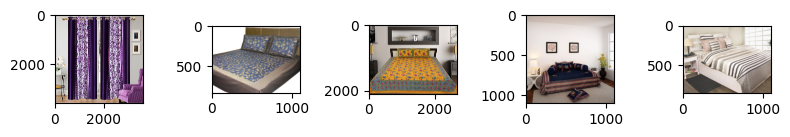

- Baby Care :


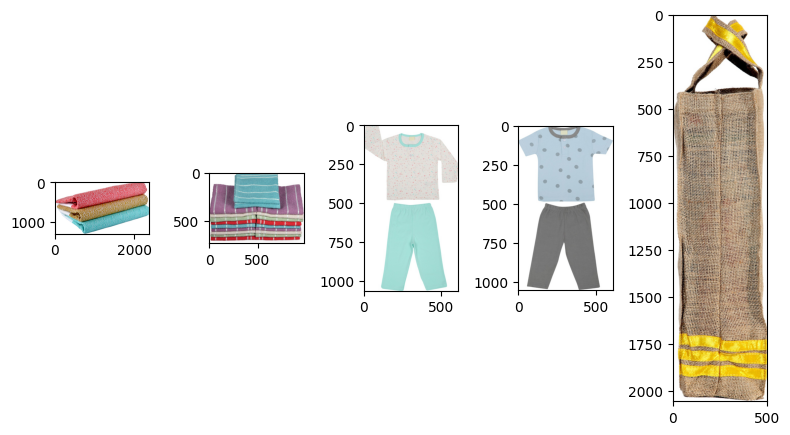

- Watches :


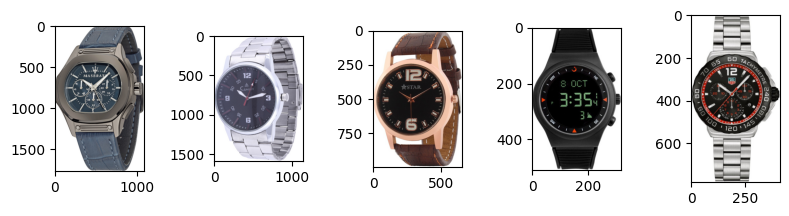

- Home Decor & Festive Needs :


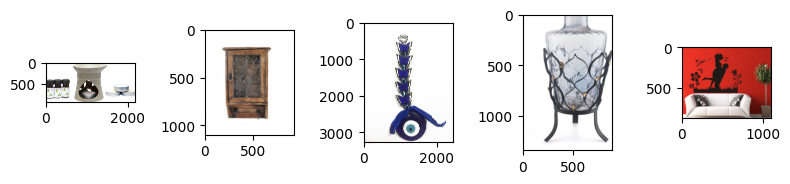

- Kitchen & Dining :


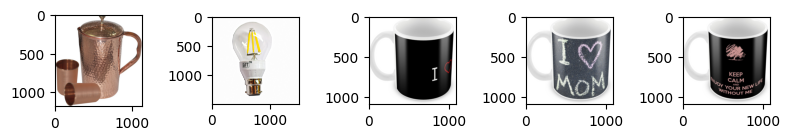

- Beauty and Personal Care :


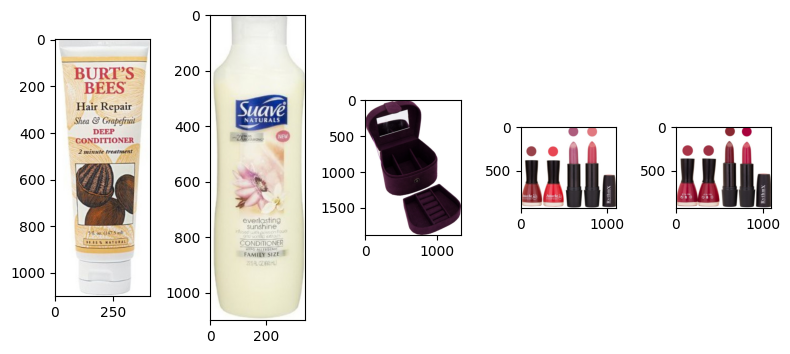

- Computers :


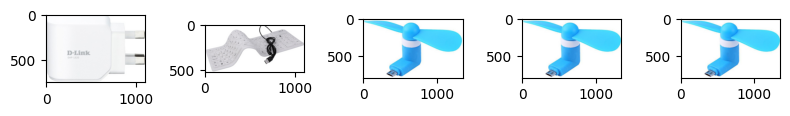

In [39]:
# Affichage des images par catégories
for categorty in df["product_category_tree"].unique() : 
    list_image(categorty, 5, show = True)

In [79]:
df["product_category_tree"].unique()[0]

'Home Furnishing '

In [83]:
# Affichage des images par catégories
list_image(df["product_category_tree"].unique()[0],0,show = False)[0]

'55b85ea15a1536d46b7190ad6fff8ce7.jpg'

# 3) Détermination des descripteurs SIFT

In [43]:
import time, cv2

In [56]:
conda list OpenCv

# packages in environment at C:\Users\ARMAN\anaconda3\envs\projet_6_OC:
#
# Name                    Version                   Build  Channel
opencv-python-headless    4.8.1.78                 pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


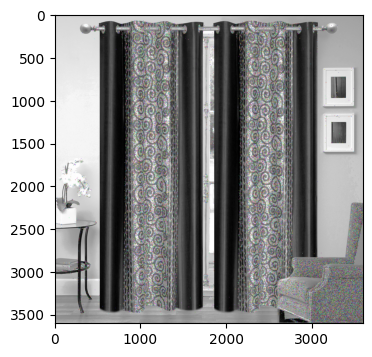

Descripteurs : (98186, 128)
[[  0.   0.   0. ...   0.   0.   0.]
 [  7.   0.   0. ...   3.   0.   7.]
 [ 12.   6.   3. ...   4.   0.   0.]
 ...
 [113.  43.  54. ...   0.   0.   0.]
 [ 33.  14.   3. ...  16.   5.   3.]
 [ 57.  32. 118. ...   0.   0.   0.]]


In [84]:
# test de la méthode sur une image
# assignation
sift = cv2.SIFT_create()
# Sélection de l'image
image = cv2.imread(path+list_image(df["product_category_tree"].unique()[0],0,show = False)[0])
# conversion en grey                   
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)                  
# equalize image histo
image = cv2.equalizeHist(image)
kp, des = sift.detectAndCompute(image, None)
img = cv2.drawKeypoints(image,kp,image)
plt.rcParams["figure.figsize"]=[8,4]
plt.tight_layout()
plt.imshow(img)
plt.show()
print(f"Descripteurs : {des.shape}")
print(des)

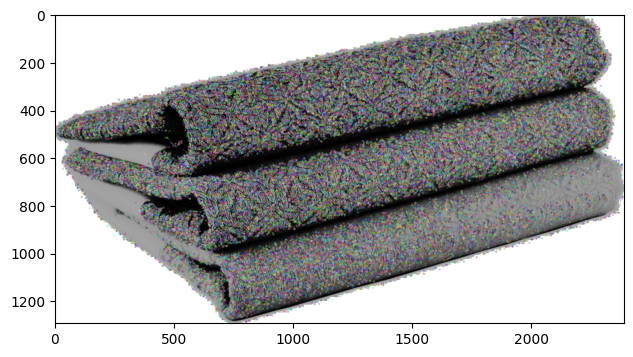

Descripteurs : (47637, 128)
[[ 80. 124.   4. ...   0.   0.   0.]
 [ 29.  80.  73. ...   0.   0.   0.]
 [ 10.  67. 115. ...   0.   0.  22.]
 ...
 [ 36.   0.   0. ...   0.   0.   0.]
 [ 37.   1.   0. ...   0.   0.   0.]
 [ 34.   0.   0. ...   0.   0.   2.]]


In [87]:
# test de la méthode sur une image
# assignation
sift = cv2.SIFT_create()
# Sélection de l'image
image = cv2.imread(path+list_image(df["product_category_tree"].unique()[1],0,show = False)[0])
# conversion en grey                   
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)                  
# equalize image histo
image = cv2.equalizeHist(image)
kp, des = sift.detectAndCompute(image, None)
img = cv2.drawKeypoints(image,kp,image)
plt.rcParams["figure.figsize"]=[8,4]
plt.tight_layout()
plt.imshow(img)
plt.show()
print(f"Descripteurs : {des.shape}")
print(des)

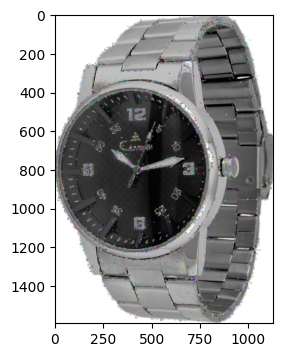

Descripteurs : (3620, 128)
[[ 16.  28.  13. ...  15.  11.   3.]
 [162.   4.   0. ...   0.   0.   0.]
 [ 21.  68.   4. ...  15.  23.  10.]
 ...
 [ 69.   0.   0. ...   6.  13.  21.]
 [139.  51.   1. ...   2.  14.  25.]
 [135.  14.   0. ...   0.   0.   2.]]


In [88]:
# test de la méthode sur une image
# assignation
sift = cv2.SIFT_create()
# Sélection de l'image
image = cv2.imread(path+list_image(df["product_category_tree"].unique()[2],0,show = False)[1])
# conversion en grey                   
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)                  
# equalize image histo
image = cv2.equalizeHist(image)
kp, des = sift.detectAndCompute(image, None)
img = cv2.drawKeypoints(image,kp,image)
plt.rcParams["figure.figsize"]=[8,4]
plt.tight_layout()
plt.imshow(img)
plt.show()
print(f"Descripteurs : {des.shape}")
print(des)

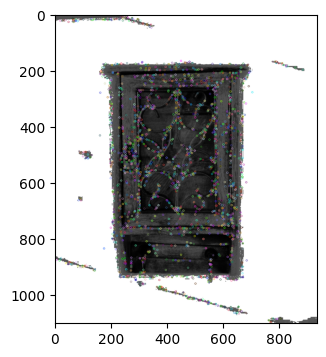

Descripteurs : (2256, 128)
[[11.  1.  0. ...  0.  0.  0.]
 [ 3.  0.  9. ...  1. 11.  9.]
 [17.  2.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  7.]
 [ 0.  0.  0. ...  0.  0.  2.]]


In [89]:
# test de la méthode sur une image
# assignation
sift = cv2.SIFT_create()
# Sélection de l'image
image = cv2.imread(path+list_image(df["product_category_tree"].unique()[3],0,show = False)[1])
# conversion en grey                   
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)                  
# equalize image histo
image = cv2.equalizeHist(image)
kp, des = sift.detectAndCompute(image, None)
img = cv2.drawKeypoints(image,kp,image)
plt.rcParams["figure.figsize"]=[8,4]
plt.tight_layout()
plt.imshow(img)
plt.show()
print(f"Descripteurs : {des.shape}")
print(des)

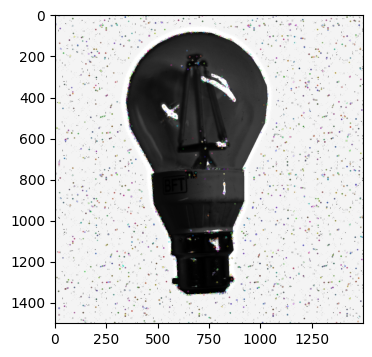

Descripteurs : (2938, 128)
[[99. 71. 41. ...  0.  0.  4.]
 [ 0.  0.  1. ...  0.  0.  1.]
 [99. 71. 41. ...  0.  0.  4.]
 ...
 [ 0.  0.  1. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  2.]
 [ 0.  0.  0. ...  0.  0.  4.]]


In [90]:
# test de la méthode sur une image
# assignation
sift = cv2.SIFT_create()
# Sélection de l'image
image = cv2.imread(path+list_image(df["product_category_tree"].unique()[4],0,show = False)[1])
# conversion en grey                   
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)                  
# equalize image histo
image = cv2.equalizeHist(image)
kp, des = sift.detectAndCompute(image, None)
img = cv2.drawKeypoints(image,kp,image)
plt.rcParams["figure.figsize"]=[8,4]
plt.tight_layout()
plt.imshow(img)
plt.show()
print(f"Descripteurs : {des.shape}")
print(des)

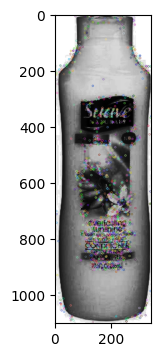

Descripteurs : (1544, 128)
[[177.   2.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  4.   1.   1. ...  48.  33.   7.]
 ...
 [185.   1.   0. ...   0.   0.   2.]
 [ 54.  10.  11. ...   0.   0.   0.]
 [  2.  12. 138. ...   8.   8.   0.]]


In [91]:
# test de la méthode sur une image
# assignation
sift = cv2.SIFT_create()
# Sélection de l'image
image = cv2.imread(path+list_image(df["product_category_tree"].unique()[5],0,show = False)[1])
# conversion en grey                   
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)                  
# equalize image histo
image = cv2.equalizeHist(image)
kp, des = sift.detectAndCompute(image, None)
img = cv2.drawKeypoints(image,kp,image)
plt.rcParams["figure.figsize"]=[8,4]
plt.tight_layout()
plt.imshow(img)
plt.show()
print(f"Descripteurs : {des.shape}")
print(des)

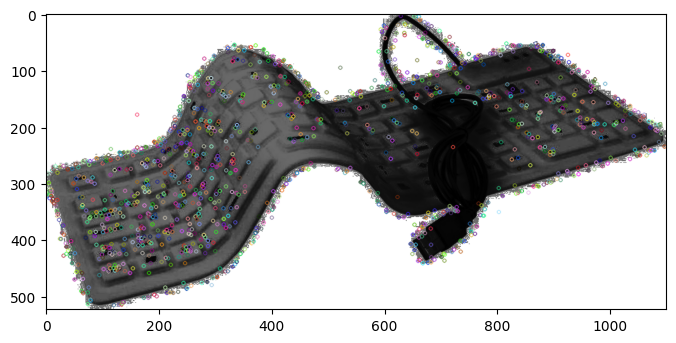

Descripteurs : (1465, 128)
[[  1.  16. 117. ...   0.  22.  76.]
 [  0.   0.  11. ...  12.   1.   1.]
 [  5.  20.  20. ...   0.   0.  10.]
 ...
 [ 83.  68.  10. ...   0.   0.   8.]
 [  0.   0.   0. ...   3.   8.  15.]
 [ 10.   1.   1. ...   0.   0.   4.]]


In [92]:
# test de la méthode sur une image
# assignation
sift = cv2.SIFT_create()
# Sélection de l'image
image = cv2.imread(path+list_image(df["product_category_tree"].unique()[6],0,show = False)[1])
# conversion en grey                   
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)                  
# equalize image histo
image = cv2.equalizeHist(image)
kp, des = sift.detectAndCompute(image, None)
img = cv2.drawKeypoints(image,kp,image)
plt.rcParams["figure.figsize"]=[8,4]
plt.tight_layout()
plt.imshow(img)
plt.show()
print(f"Descripteurs : {des.shape}")
print(des)

## 3.1) Création des descripteurs pour chaque image

In [162]:
import time, cv2

In [185]:
# Extraction des descripteurs par image

descripteurs_list_img = []
T0 = time.time()
for img in df["image"]:
    # assignation
    sift = cv2.SIFT_create(500)
    # Sélection de l'image
    image = cv2.imread(path+img)
    # conversion en grey                   
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)                  
    # equalize image histo
    image = cv2.equalizeHist(image)
    kp, des = sift.detectAndCompute(image, None)
    descripteurs_list_img.append(des)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

 temps de traitement 344.3961625099182 secondes


In [186]:
# array des descripteurs
descripteurs_list_img

[array([[  4.,   0.,   0., ...,   0.,   1.,  12.],
        [  3.,   2.,   3., ...,   0.,   0.,   3.],
        [  4.,   0.,   0., ...,   3.,   0.,   0.],
        ...,
        [ 11.,   0.,   0., ...,   0.,   0.,  12.],
        [ 77.,  77.,   0., ...,   0.,   1.,  18.],
        [  6.,   4.,   1., ..., 144.,   5.,   0.]], dtype=float32),
 array([[  5.,  67.,   8., ...,   0.,   0.,   0.],
        [ 19., 105.,  25., ...,  58.,  49.,  13.],
        [ 35., 107.,  60., ...,  64.,  62.,  33.],
        ...,
        [ 11.,  21.,  89., ...,  23.,  25.,  10.],
        [ 12.,   1.,   2., ...,  75.,  25.,   7.],
        [ 18.,   3.,  24., ...,  34.,  23.,   3.]], dtype=float32),
 array([[  0.,   0.,   1., ...,   1.,   0.,   5.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [ 11.,  31., 113., ...,  15., 132.,   7.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   6.],
        [  0.,   0.,   0., ...,   0.,   0.,   8.],
        [  2.,   0.,   0., ...,   0.,   0.,   0.]], dtype=fl

In [187]:
# array des descripteurs
descripteurs_list_img_all  = np.concatenate(descripteurs_list_img, axis=0)
descripteurs_list_img_all.shape

(105379, 128)

In [188]:
descripteurs_list_img_all

array([[  4.,   0.,   0., ...,   0.,   1.,  12.],
       [  3.,   2.,   3., ...,   0.,   0.,   3.],
       [  4.,   0.,   0., ...,   3.,   0.,   0.],
       ...,
       [ 10.,   3.,   3., ...,   3.,   9., 100.],
       [  3.,  10.,  21., ...,   4.,  14.,  32.],
       [ 13.,  10.,  17., ...,   3.,  59.,  55.]], dtype=float32)

## 3.2) Création des clusters descripteurs

In [189]:
from sklearn import cluster, metrics

In [190]:
# dfinition de k clusters racine carré du nb de descripteurs
k = int(round(np.sqrt(len(descripteurs_list_img_all)),0))
k

325

In [191]:
# clustering
T0 = time.time()
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size = 3*k, random_state = 0)
kmeans.fit(descripteurs_list_img_all)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

C:\Users\ARMAN\anaconda3\envs\projet_6_OC\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


 temps de traitement 2.5934834480285645 secondes


## 3.3) Création des features images

In [192]:
# Fonction de réalisation d'histogramme

def features_histogram(kmeans, des, image_num):
    pred = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0 : print(f"pb image : {image_num}")
    for i in pred :
        hist[i] += 1.0/nb_des
    return hist
                           
T0 = time.time()
# Création de la matrice d'histogrammes
hist_vectors = []
for i, img_desc in enumerate(descripteurs_list_img) :
    hist = features_histogram(kmeans, img_desc, i)
    hist_vectors.append(hist)
print(f" temps de traitement {duration} secondes")

 temps de traitement 2.5934834480285645 secondes


In [193]:
im_features = np.asarray(hist_vectors)
im_features.shape

(1050, 325)

## 3.4) Réduction dimension

### 3.4.1) PCA

In [194]:
from sklearn.decomposition import PCA

In [195]:
# réduction pca
pca = PCA(n_components=0.99)
feat_pca = pca.fit_transform(im_features)

In [196]:
# check réduction
feat_pca.shape

(1050, 283)

### 3.4.2) TSNE

In [197]:
from sklearn.manifold import TSNE

In [198]:
# Mise en place TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

In [199]:
# dataframe
df_tsne = pd.DataFrame(X_tsne, columns = ["tsne1", "tsne2"])
df_tsne["product_category_tree"] = df["product_category_tree"]
df_tsne["label_categories"] = df["label_categories"]
df_tsne

,tsne1,tsne2,product_category_tree,label_categories
0,5.371989,26.621817,Home Furnishing,4
1,-11.607983,-25.511244,Baby Care,0
2,17.530460,28.177467,Baby Care,0
3,-20.709286,-17.648182,Home Furnishing,4
4,-10.659706,-25.790569,Home Furnishing,4
...,...,...,...,...
1045,-32.885780,-9.727301,Baby Care,0
1046,18.843416,32.833458,Baby Care,0
1047,-6.152817,-8.883940,Baby Care,0
1048,14.542809,29.346611,Baby Care,0


### 3.4.2) Classification selon vraies catégories

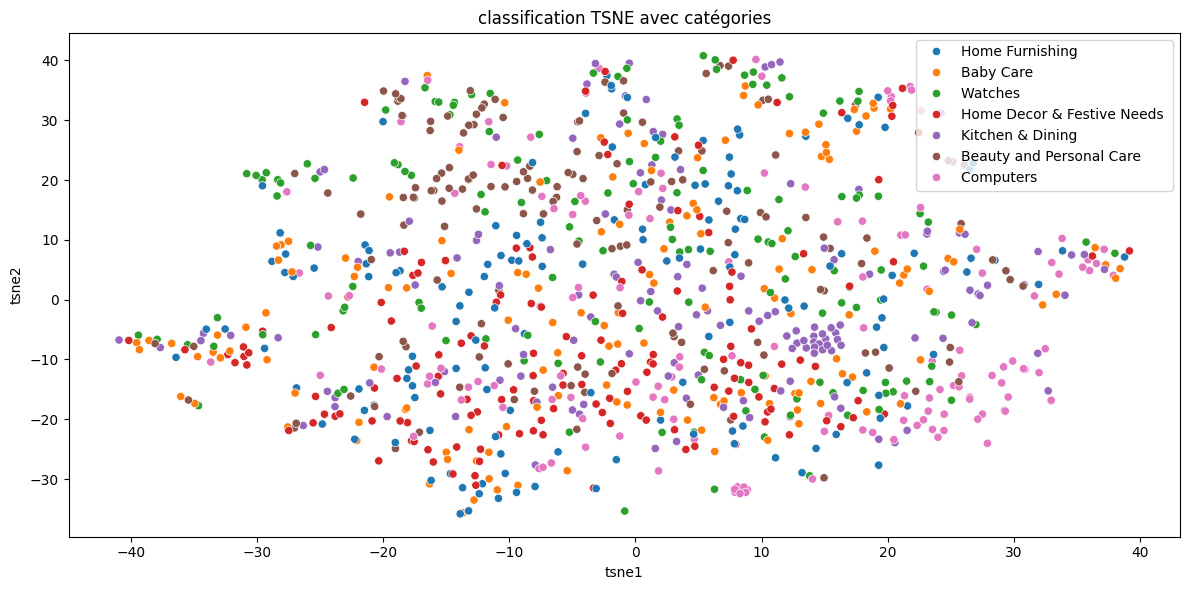

In [200]:
# Classification selon vraies catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "product_category_tree",
                palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE avec catégories")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

### 3.4.2) Classification selon KMEANS

In [201]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [202]:
# mise en place du Kmeans
kmeans = KMeans(n_clusters = 7, n_init = 100, random_state = 0)
kmeans.fit(df_tsne[["tsne1","tsne2"]])

KMeans(n_clusters=7, n_init=100, random_state=0)

In [203]:
# Ajout des lables
df_tsne["clusters"] = kmeans.labels_

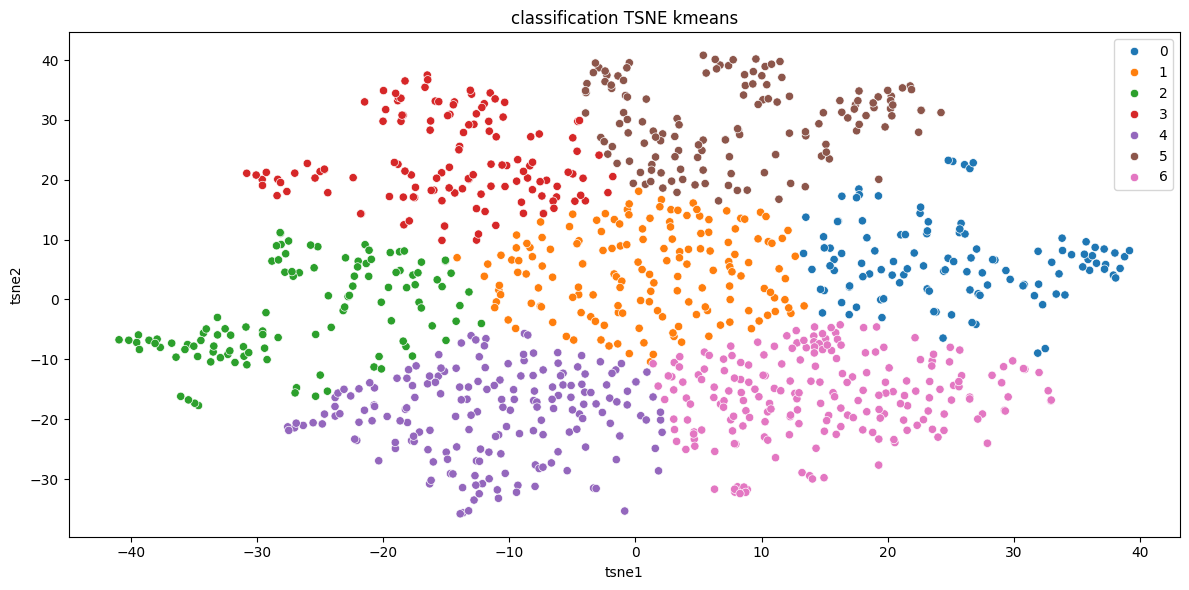

In [204]:
# Classification selon kmeans catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "clusters",
               palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE kmeans")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

In [205]:
# Mesure ARI
ARI = metrics.adjusted_rand_score(df_tsne["label_categories"], df_tsne["clusters"])
ARI

0.041543611520573634